> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **As an animation movies fan, I'll try to explore the TMDB movie data and find out how the production of animation movies changed through the years? also which actor contributed the most to this movies?.**

# About the Data
### TMDB movie data
**The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.**

Certain columns, like: 
>‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib
from collections import Counter
import warnings

plt.style.use('bmh')
warnings.filterwarnings('ignore')

%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#loading movie data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
print('DataFrame size =',df.shape) # inspecting the data frame size
print(df.info())

DataFrame size = (10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   obj

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

**looking at the data info I found that:**

> Homepage, tagline and keywords having alot of missing data. I won't need thoes columns.

> There is some missing data in most of the columns

> Release date is not in the best format need to change into datetime

> columns with multiple values need to spread for more insights

> Missing data in budget, revenue, budget_adj and revenue_adj donated as zeros

In [5]:
#Addressing the columns to be droped
movies_df = df.copy() # making copy of the dataset
drop_columns = ['homepage','tagline','id','imdb_id','keywords'] # columns that I don't need
movies_df.drop(labels = drop_columns,axis=1,inplace=True); # dropping columns from the dataset

In [6]:
#cast,director,overview,genres,and production_companies colums has missing data
movies_df.dropna(inplace=True)

In [7]:
#changing data type of release date column
movies_df.release_date = pd.to_datetime(movies_df.release_date)

In [8]:
#genres and cast and production_companies have multi-values 
#I will spread these values in multiple columns indicating 1 if single value is present and 0 if absent

#manipulating genres values
mixed_genres = movies_df.genres.unique()

'''
first attempt to create genres set:

genres_clean = set()
for i in mixed_genres:
    if '|' in i:
        lis = i.split('|')
        for x in lis:
            genres_clean.add(x)
            
    else:
        genres_clean.add(i)

'''
genres_clean = set(x for i in mixed_genres for x in i.split('|'))#creating a set contain all the single genre in the dataset
#creating columns for every single genre in dataset and assign values for each movie
for gen in sorted(genres_clean):
    movies_df[gen] = movies_df.genres.apply(lambda x:1 if gen.lower() in x.lower() else 0);


In [9]:
#manipulating cast values
mixed_cast = movies_df.cast.unique()
cast_clean = [x for i in mixed_cast for x in i.split('|')]#creating a set contain all the single cast in the dataset

#cast_clean contain 17124 actor, since that will be huge number byond the scope of this assignment 
#I will use top 9 frequent actors
actors_count = Counter(cast_clean)
top9_actors = [actor[0] for actor in actors_count.most_common()[:9]]

#creating columns for every actor
for actor in top9_actors:
    movies_df[actor] = movies_df.cast.apply(lambda x:1 if actor.lower() in x.lower() else 0 )

In [24]:
movies_df['director'].value_counts()

Woody Allen             42
Clint Eastwood          34
Steven Spielberg        29
Martin Scorsese         26
Ridley Scott            23
                        ..
Nico Mastorakis          1
Richard Kwietniowski     1
Mike Bigelow             1
Shona Auerbach           1
Isaac Feder              1
Name: director, Length: 4505, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

# Q1.How  production of Animation genre changed through 1960-2015 period?




In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

year_gen_movies = movies_df.groupby('release_year').sum().iloc[:,8:28] # chooseing columns with genres only
year_gen_movies['Total'] = year_gen_movies.sum(axis=1) # creating a total column to caluclate percentage of each genre
year_gen_movies = year_gen_movies.div(year_gen_movies.Total,axis=0).multiply(100,axis=0) # changing columns value to percentage

**First thing I would likt to see how the percentage of animation movies to the total movies for each year changes.**

**for that I will explore the data with line graph for animation movies percentages (y-axis) compared with production year(x-axis)**

In [11]:

#Creating dropdown menu to choose which genre will be graphed
dropdown_line = widgets.Dropdown(options=sorted(list(genres_clean)), value='Animation', description= 'Genre1',)


def line_analysis(value):
    plt.figure()# new figuer
    y = year_gen_movies.loc[:,value] # getting appropriate column to plot

    y.plot(title= f'{value} Movies',ylabel = 'Percentage %') # plotting column

widgets.interact(line_analysis, value=dropdown_line) # creating interactive plot

interactive(children=(Dropdown(description='Genre1', index=2, options=('Action', 'Adventure', 'Animation', 'Co…

<function __main__.line_analysis(value)>

**As the plot shows there could be an increase of the animation movie production happening thorugh out the years**

### Also given the data that we have I would like to explore the frequency of the animation movie compared to other genres.

**for that I will plot histogram for animation movies and see which percentage does it takes the most**

In [12]:
dropdown_hist = widgets.Dropdown(options=sorted(list(genres_clean)), value='Animation', description= 'Genre1',)

def hist_analysis(value):
    fig,ax = plt.subplots()
    y = year_gen_movies.loc[:,value] # getting appropriate column to plot
    
    ax.hist(y)
    ax.set_title(f'{value} Movies Histogram')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Percentage')

widgets.interact(hist_analysis, value=dropdown_hist) # creating interactive plot

interactive(children=(Dropdown(description='Genre1', index=2, options=('Action', 'Adventure', 'Animation', 'Co…

<function __main__.hist_analysis(value)>

#### Given what we have, it appears that animation movies peaked at 1% and 3% which indecate that it is still not very popular among other genres

# Q2. Which actor from the top 9 actors particibate in animation movies more and what is the average of vote for movies he particibate in?

In [13]:
cast_df = movies_df.copy() # creating copy of dataframe
cast_df = cast_df[(cast_df['budget_adj'] != 0) & (cast_df['revenue_adj'] != 0) ] # chooseing only datat where budget_adj and revenue_adj are non zeros
cast_df['movies_profit'] = cast_df['revenue_adj'] - cast_df['budget_adj'] # creating profit column

In [14]:
# creating unique dataframe containg data average for each actor individually
top9_actors_stat = pd.DataFrame()
for actor in top9_actors:
    _ = cast_df[cast_df[actor] == 1]
    _['movies_count'] = _.shape[0]/2
    top9_actors_stat[actor] = pd.Series(_.mean(),name=actor)

**Plotting bar graph for each actor against the percentage of animation movies of total movies he made, will help me to investigate which actor contributes for animation movies the most from top 9 list I made**

<IPython.core.display.Javascript object>


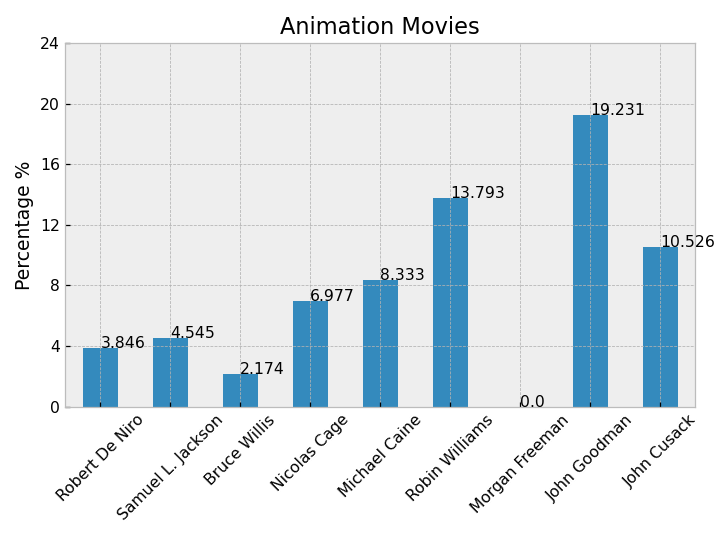

In [54]:
#Plotting percentage of animation movies that actor participate in
plt.figure() # creating plot figure
animation_series = top9_actors_stat.T.loc[:,'Animation'].multiply(100) # getting only series object for animation movies only
#plotting series
ax = animation_series.plot.bar()
x_ticks = list(animation_series.index) # collecting x label for each bar in a list
ax.set_title('Animation Movies')
ax.set_ylabel('Percentage %')
ax.set_yticks(range(0,25,4))
ax.set_xticklabels(x_ticks, rotation = 45)

plt.tight_layout()
# labeling each bar with the corresponding value
for i, label in enumerate(list(animation_series.index)):
    score = animation_series[i]
    ax.annotate(str(round(score,3)), (i, score+0.002))

**From the graph we find that about 20% of John Goodman movies are animation movies having the highst percentage among other actors**

**Next I would like to compare movies average profit which each actor casted in with each other**

<IPython.core.display.Javascript object>


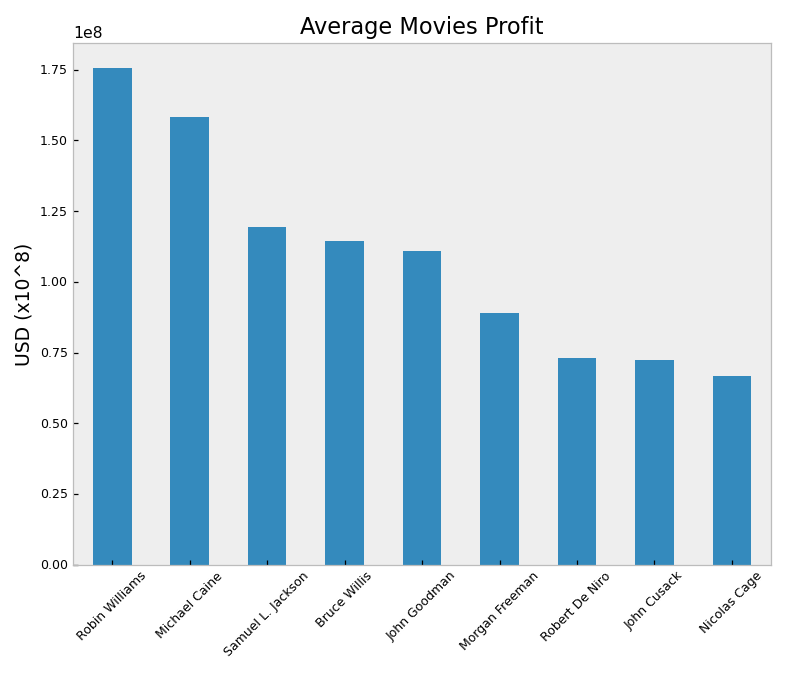

In [55]:
# plotting average profit of movies participated by each actor
plt.figure()
animation_series = top9_actors_stat.T.loc[:,'movies_profit'].sort_values(ascending=False)
ax = animation_series.plot.bar(title='Average Movies Profit',ylabel='USD (x10^8)',rot=45,figsize=(7,6),stacked=True,
                               fontsize=8,)
ax.grid(False)
plt.tight_layout()

**Doing so we can find that John Goodman moives profit came fith to other actors**

**More insights can be down with more analysis to the data and here I'll try to compare two variables with each other and see what can we conclude if any.**

In [67]:
# making genres data percentage form 0.12 --> 12%
top9_actors_stat.loc[genres_clean] = top9_actors_stat.loc[genres_clean]*10

#choosing compararple columns with close data ranges
plt_columns = ['popularity','vote_average','Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western','movies_count']

# creating dictionary for y-axis labels
y_axis_labels = {'genres':'Percentage % (x10)' , 'popularity' : 'Popularity Mean', 'vote_average' : 'Vote Averages',
                    'movies_count' : 'Movies Count (x2)'}

In [70]:
#creating two attributes dropdown menus
Atribute1 = widgets.Dropdown(options= plt_columns, value='Animation', description= 'Atribute1')
Atribute2 = widgets.Dropdown(options= plt_columns, value='Action', description= 'Atribute2')

def getting_y_label(v1,v2):
    global label1
    global label2
    
    if v1 in genres_clean:
        label1 = y_axis_labels['genres']
    else:
        label1 = y_axis_labels[v1]
        
    if v2 in genres_clean:
        label2 = y_axis_labels['genres']
        
    else:
        label2 = y_axis_labels[v2]
    return label1,label2

def Dropdown_Menu(value1,value2):
    
    y = top9_actors_stat.loc[[value1,value2]] # getting appropriate column to plot
    
    #getting appropriate y-axis label for each value
    y1_label,y2_label = getting_y_label(value1,value2)
    #y1_label = y_axis_labels['genres'] if value1 in genres_clean else y_axis_labels[value1]
    #y2_label = y_axis_labels['genres'] if value2 in genres_clean else y_axis_labels[value2]
        
    
    ax1 = y.plot(kind='bar',rot=0,fontsize=20,
          title=f'{value1.capitalize()} and {value2.capitalize()} Graph',figsize=(8,6)) # plotting column
    
    ax1.set_ylabel(y1_label)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(y2_label)
    ax2.set_yticks([])
widgets.interact(Dropdown_Menu, value1=Atribute1,value2=Atribute2)

interactive(children=(Dropdown(description='Atribute1', index=4, options=('popularity', 'vote_average', 'Actio…

<function __main__.Dropdown_Menu(value1, value2)>

**The animation percentage bars and the action percentage bars look strangely like a mirror. We can't coclude any thing with just a graph like that since there are many variable can influnce this but it may be there is a relation that actors that acts in more action movies won't act on animation movies. Unfortunatly we can't investigate this furthur with such small data with small actors**

<a id='conclusions'></a>
# Conclusions

# Q1

**Many movie's genres show changes over the period of time we analysis like**

> Animation, Documentary and Thriller which show an increasing percentage of the production

> History, Romance and Western which show a decreasing percentage of the production

# Q2
**Unfortunately some of the 'revenue_adj and 'budget_adj' columns contain zeros entry so I had excluded them 
which result in a huge decrease in the data set from 9773 to 3806 entries that had high empact on the number of movies for each actor which limits my findings. That been said, while the true numbers is not very good indicator but we can rely on the difference between the actors, so we can conclude that:**

> 1- John Goodman was the highest actor to cast in animation movie with about 20% of his movies been animation

>  2- John Goodman came fifth by the average amount of his movies profit
